In [74]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('Wholesale customers data.csv')

In [76]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [77]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [79]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [80]:
df.duplicated().sum()

0

In [81]:
df=df.drop('Channel',axis=1)

In [82]:
df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [83]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

In [84]:
# Normalize the numeric columns (Age and Salary)
df[['Fresh', 'Milk']] = scaler.fit_transform(df[['Fresh', 'Milk']])

In [85]:
df

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,0.112940,0.130727,7561,214,2674,1338
1,3,0.062899,0.132824,9568,1762,3293,1776
2,3,0.056622,0.119181,7684,2405,3516,7844
3,3,0.118254,0.015536,4221,6404,507,1788
4,3,0.201626,0.072914,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,0.264829,0.163338,16027,13135,182,2204
436,3,0.349761,0.018736,764,4510,93,2346
437,3,0.129543,0.210136,30243,437,14841,1867
438,3,0.091727,0.026224,2232,1038,168,2125


In [86]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()

In [87]:
X=stscaler.fit_transform(df)

In [88]:
X

array([[ 0.59066829,  0.05293319,  0.52356777, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 0.59066829, -0.39130197,  0.54445767, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 0.59066829, -0.44702926,  0.40853771, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 0.59066829,  0.20032554,  1.31467078, ..., -0.54337975,
         2.51121768,  0.12145607],
       [ 0.59066829, -0.13538389, -0.51753572, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [ 0.59066829, -0.72930698, -0.5559243 , ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [89]:
import scipy.cluster.hierarchy as sch

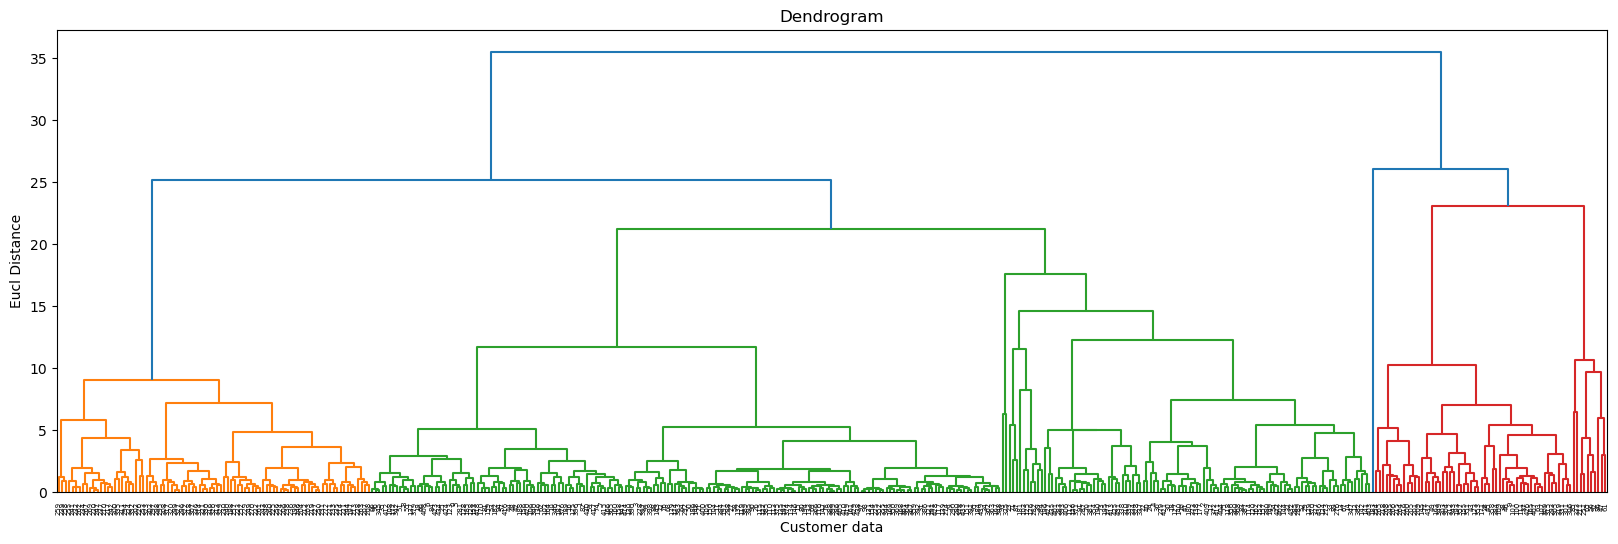

In [90]:
plt.figure(figsize=(20,6))
dendo=sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

In [91]:
len(set(dendo['color_list']))-1

3

In [92]:
from sklearn.cluster import AgglomerativeClustering 

In [93]:
model=AgglomerativeClustering(n_clusters=3)
cluster=model.fit_predict(X)

In [94]:
clusterA

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [95]:
group_num=pd.DataFrame(cluster)
group_num

,0
0,0
1,0
2,0
3,0
4,0
...,...
435,0
436,0
437,1
438,0


In [96]:
pd.concat([df,group_num],axis=1)

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,0
0,3,0.112940,0.130727,7561,214,2674,1338,0
1,3,0.062899,0.132824,9568,1762,3293,1776,0
2,3,0.056622,0.119181,7684,2405,3516,7844,0
3,3,0.118254,0.015536,4221,6404,507,1788,0
4,3,0.201626,0.072914,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...
435,3,0.264829,0.163338,16027,13135,182,2204,0
436,3,0.349761,0.018736,764,4510,93,2346,0
437,3,0.129543,0.210136,30243,437,14841,1867,1
438,3,0.091727,0.026224,2232,1038,168,2125,0


In [97]:
from sklearn.metrics import silhouette_score
silhouette_score(X,cluster)

0.3948160758358289

# K-MEANS

In [99]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [101]:
wcss

[2393.775124646937,
 2028.0473827585408,
 1713.0971281285986,
 1472.0552858593455,
 1405.6698065229643,
 1245.6240036370355,
 995.8959216758975,
 906.0952987682664,
 818.4757879942654]

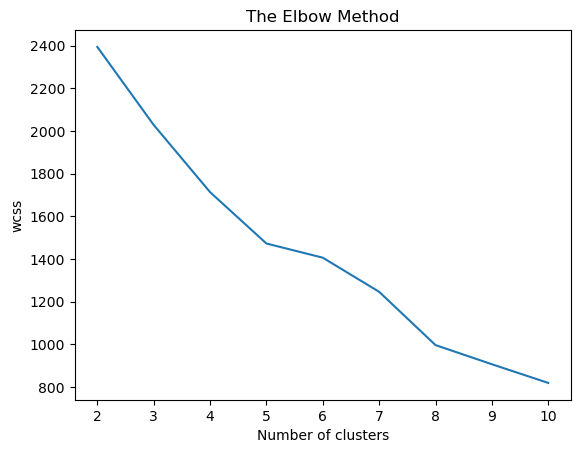

In [124]:
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [126]:
kmeans=KMeans(n_clusters=4,random_state=42)
y_means=kmeans.fit_predict(X)
print(y_means)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 3 0 0 0 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 3 0 0
 0 0 0 2 0 0 0 0 0 0 0 2 2 3 0 0 0 0 2 3 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 3 0 3 0
 0 0 0 0 0 0 0 0 0 0 0 3 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 3 1 1 1 1 1 2 1
 2 1 1 1 1 1 1 0 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 3 0 2 0 0]
